# Homework 5

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Question 1.a

the potential energy function of two unlike charged particles in 3D, which includes
the usual Coulombic attraction term and a centrifugal repulsion term

$$
U(x) = -\frac{k}{r} + \frac{l^2}{2mr^2}
$$

In [4]:
h = 1e-6

def U(r: float) -> float:
    """
        Returns the potential energy function of two unlike charged particles in 3D space.
    Args:
        r (float): The distance between the two particles.

    Returns:
        float: The potential energy of the system.
    """
    k = 18
    m = 1
    l = 3
    return -k/r + l**2/(2*m*r**2)

def Up(r: float) -> float:
    """
        Returns the first derivative of the potential energy function of two unlike charged particles in 3D space.
    Args:
        r (float): The distance between the two particles.

    Returns:
        float: The value of the first derivative of the potential energy of the system.
    """
    return (U(r+h) - U(r-h))/(2*h)

def Upp(r: float) -> float:
    """
        Returns the third derivative of the potential energy function of two unlike charged particles in 3D space.
    Args:
        r (float): The distance between the two particles.

    Returns:
        float: The value of the second derivative of the potential energy of the system.
    """
    return (U(r+h) - 2*U(r) + U(r-h))/h**2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


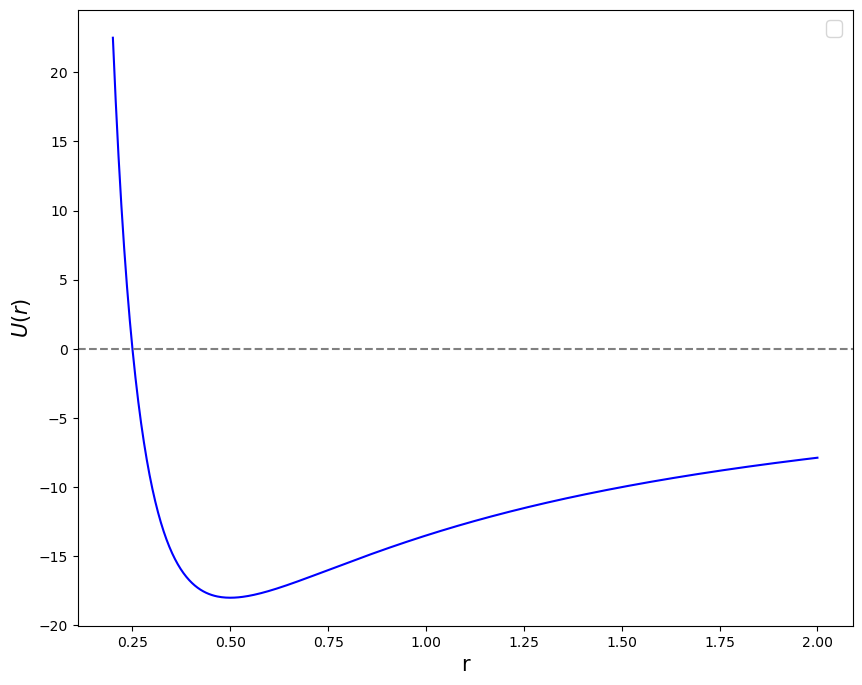

In [5]:
r_arr = np.linspace(0.2, 2, 500)

plt.figure(figsize=(10,8))
plt.plot(r_arr, U(r_arr), c='blue')
plt.xlabel('r', size=15)
plt.ylabel('$U(r)$', size=15)

plt.axhline(y=0, linestyle='--', color='gray')
plt.legend(fontsize=15)

# Question 1.b

Solving analytically for the location at which this potential energy is minimized

using our previous potential energy function and substituting in the values $k = 18$, $l = 3$, $m = 1$

$$
U(r) = -\frac{18}{r} + \frac{(3)^2}{2r^2}
$$

$$
U(r) = -\frac{18}{r} + \frac{9}{2r^2}
$$

Taking the derivative with respect to $r$

$$
U'(r) = \frac{18}{r^2} - \frac{9}{r^3}
$$

Rewriting this into one single fractions

$$
U'(r) = \frac{9(2r - 1)}{r^3} 
$$

Now solving for $r$ when $U'(r) = 0$

$$
0 = \frac{9(2r - 1)}{r^3} 
$$

Multiplying by $r^3$ and dividing $9$ in both sides

$$
0 = 2r - 1
$$

solving for $r$

$$
r = \frac{1}{2}
$$

Using Newtown method to check our answer computationally

In [6]:
def Newton_Method(r: float) -> float:
    """
        Returns the newton's method approximation of the root 
    Args:
        r (float): the initial guess of the root

    Returns:
        float: the approximation of the root
    """
    r_prev = r
    eps = 1e-5
    err = 1

    steps = 0
    while err > eps:
        # If Upp(r) = 0, then the method will fail to converge due to division by zero
        if Upp(r_prev) == 0:
            print(f'Error: At step {steps} Upp(r) = 0')
            break
        # calculate the next approximation
        r_next = r_prev - Up(r_prev)/Upp(r_prev)
        # calculate the error
        err = abs(r_next - r_prev)
        # the next approximation becomes the previous approximation
        r_prev = r_next
        steps += 1
        # we only care for the first 15 steps
        if steps >= 15:
            break
        
    return r_prev

In [7]:
root = Newton_Method(2)
print(root)

Error: At step 11 Upp(r) = 0
214.65031301324424


# Question 1.c

Error: At step 12 Upp(r) = 0
Error: At step 11 Upp(r) = 0
Error: At step 12 Upp(r) = 0
Error: At step 10 Upp(r) = 0
Error: At step 10 Upp(r) = 0
Error: At step 13 Upp(r) = 0
Error: At step 12 Upp(r) = 0
Error: At step 10 Upp(r) = 0
Error: At step 12 Upp(r) = 0
Error: At step 10 Upp(r) = 0
Error: At step 12 Upp(r) = 0
Error: At step 11 Upp(r) = 0
Error: At step 11 Upp(r) = 0


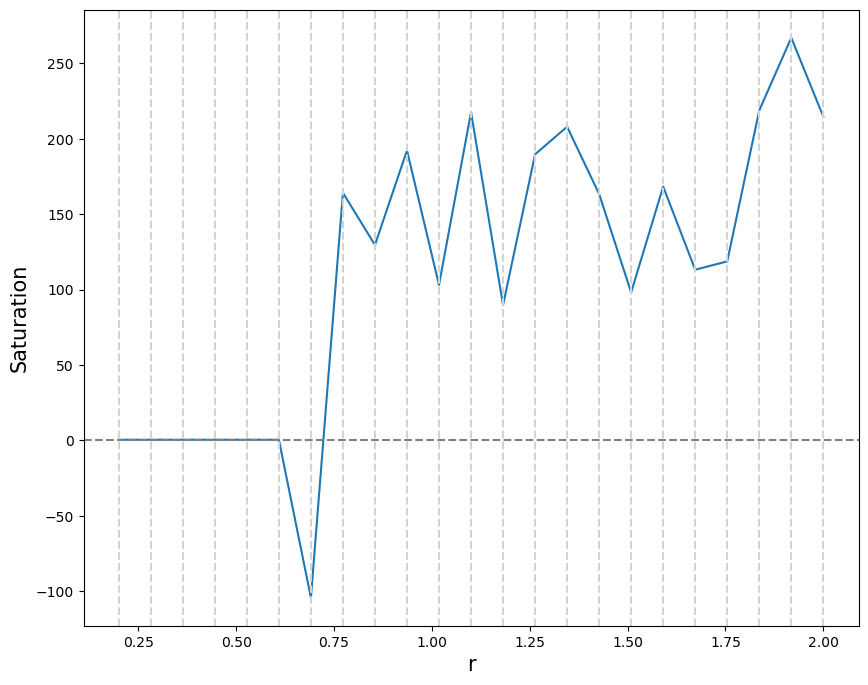

In [8]:
Npts = 23
r_arr = np.linspace(0.2, 2, Npts, endpoint=True)
saturation = np.empty(Npts)

for i in range(Npts):
    saturation[i] = Newton_Method(r_arr[i])

plt.figure(figsize=(10, 8))
plt.plot(r_arr, saturation, '-')

for r in r_arr:
    plt.axvline(x=r, linestyle='--', color='lightgray')

plt.axhline(y=0.5, linestyle='--', color='gray')

plt.xlabel('r', fontsize=15)
plt.ylabel('Saturation', fontsize=15)

plt.show()

My implementation of Newthon's method seems to diverge after 6 points

# Question 1.d

In [9]:
def Bisection_Method(x1: float, x2: float) -> float:
    """
        Returns the bisection method approximation of the root

    Args:
        x1 (float): The lower bound of the interval
        x2 (float): The upper bound of the interval

    Returns:
        float: The approximation of the root
    """
    eps = 1e-5
    # Initial error estimate
    err = abs(x2 - x1)

    count = 0
    while err > eps:
        xmid = (x1 + x2)/2
        
        if np.sign(Up(xmid)) == np.sign(Up(x1)):
            x1 = xmid
        elif np.sign(Up(xmid)) == np.sign(Up(x2)):
            x2 = xmid
        
        err = abs(x2 - x1)
        count = count + 1
        
    print('Bisection method converged in', count, 'steps to an accuracy of', err)
    print('The root is approximately ', (x1 + x2)/2)

    return (x1 + x2)/2

In [10]:
bs = Bisection_Method(0.2, 2)

Bisection method converged in 18 steps to an accuracy of 6.866455078191613e-06
The root is approximately  0.4999988555908204


In [11]:
def Stable_Convergence(x1: float, x2: float) -> float:
    """
        Returns the stable convergence approximation of the root

    Args:
        x1 (float): The lower bound of the interval
        x2 (float): The upper bound of the interval

    Returns:
        float: The approximation of the root
    """
    eps = 1e-5
    # Initial error estimate
    x_prev = (x1 + x2)/2
    err = abs(x2 - x1)
    
    count = 0
    while err > eps:
        # if x_prev is outside the interval, run bisection method
        if x_prev > x2 or x_prev < x1:
            x_prev = (x1 + x2)/2
            if np.sign(Up(x_prev)) == np.sign(Up(x1)):
                x1 = x_prev
            elif np.sign(Up(x_prev)) == np.sign(Up(x2)):
                x2 = x_prev
                
            err = abs(x2 - x1)
            count = count + 1
        # if x_prev is inside the interval, run newton's method
        x_next = x_prev - Up(x_prev)/Upp(x_prev)
        err = abs(x_next - x_prev)
        x_prev = x_next
        count = count + 1
        
    print('Stable convergence method converged in', count, 'steps to an accuracy of', err)
    print('The root is ', x_prev)
    
    return x_prev

In [12]:
sc = Stable_Convergence(0.2, 2)

Stable convergence method converged in 11 steps to an accuracy of 3.5825314603776803e-08
The root is  0.5000000000234638
